# Explore the Limit Order Book data provided by Andreas

Data is from [E-mini S&P 500](http://www.cmegroup.com/trading/equity-index/us-index/e-mini-sandp500.html) Futures contracts (with the most recent expiry). The timestamps are in nanoseconds Unix time, but can be converted to DateTime objects in Pandas. The specifications for the contracts can be found on CME website.

In [55]:
import pandas as pd
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
mydata = pd.HDFStore('data/1707/170703#ES.F.GLOB.1709#I#310#SBE##AB#t0.chi#top5.h5')

### Explore the data

In [4]:
# Format
print(mydata)

<class 'pandas.io.pytables.HDFStore'>
File path: data/1707/170703#ES.F.GLOB.1709#I#310#SBE##AB#t0.chi#top5.h5
/data                    frame                       
/feed_sources            frame        (shape->[1,21])


In [6]:
# Ok, we see that this is a class with the data stored in the 'data' property
df = mydata['data']
df.head(5)

,seq_num,bid,bid_qty,ask,ask_qty,bid,bid_qty,ask,ask_qty,bid,...,ask,ask_qty,bid,bid_qty,ask,ask_qty,bid,bid_qty,ask,ask_qty
,0,0,0,0,0,1,1,1,1,2,...,2,2,3,3,3,3,4,4,4,4
t_ns,,,,,,,,,,,,,,,,,,,,,
1499032800045275159,3083,242175.0,41,242200.0,56,242150.0,56,242225.0,127,242125.0,...,242250.0,227,242100.0,103,242275.0,15,242075.0,20,242300.0,120
1499032800045599244,3089,242175.0,47,242200.0,56,242150.0,56,242225.0,127,242125.0,...,242250.0,227,242100.0,103,242275.0,15,242075.0,20,242300.0,120
1499032800053593359,3102,242175.0,40,242200.0,56,242150.0,56,242225.0,127,242125.0,...,242250.0,227,242100.0,103,242275.0,15,242075.0,20,242300.0,120
1499032800053820133,3112,242175.0,40,242200.0,56,242150.0,56,242225.0,127,242125.0,...,242250.0,227,242100.0,104,242275.0,15,242075.0,20,242300.0,120
1499032800058360815,3136,242150.0,56,242200.0,56,242125.0,57,242225.0,127,242100.0,...,242250.0,227,242075.0,20,242275.0,15,242050.0,45,242300.0,120


In [25]:
# Seems to contain MultiIndex indices... have to make sense of these
df.columns

MultiIndex(levels=[[u'ask', u'ask_qty', u'bid', u'bid_qty', u'seq_num', u't_ns'], [0, 1, 2, 3, 4]],
           labels=[[4, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1], [0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4]])

In [40]:
# Get the first 5 level 5 bid prices
df['bid',4].head()

t_ns
1499032800045275159    242075.0
1499032800045599244    242075.0
1499032800053593359    242075.0
1499032800053820133    242075.0
1499032800058360815    242050.0
Name: (bid, 4), dtype: float64

In [7]:
df['ask_qty',3].head()

t_ns
1499032800045275159    15
1499032800045599244    15
1499032800053593359    15
1499032800053820133    15
1499032800058360815    15
Name: (ask_qty, 3), dtype: int64

In [16]:
# Convert Unix timestamps to human readable form
pd.to_datetime(df.index[-1], utc=True)

Timestamp('2017-07-03 17:15:00.045141629+0000', tz='UTC')

The timestamps look a bit odd... not sure why they go from 22:00 to 17:15. Which time zone is this?

In [53]:
# Get order book data for one random point in time
T = len(df.index)
i = rnd.randint(T)
ask_prices = df['ask'].iloc[i,:]
bid_prices = df['bid'].iloc[i,:]
ask_volumes = df['ask_qty'].iloc[i,:]
bid_volumes = df['bid_qty'].iloc[i,:]

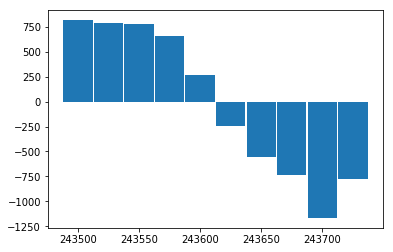

In [54]:
# Bar plot the limit order data for one particular time point
plt.bar(np.concatenate((bid_prices,ask_prices)), np.concatenate((bid_volumes,-ask_volumes)),width=24)
plt.show()

In [76]:
# Now extend this a bit
prices = np.concatenate((df['bid'],df['ask']),axis=1)
volumes = np.concatenate((df['bid_qty'],-df['ask_qty']),axis=1)
times = pd.to_datetime(df.index, utc=True)

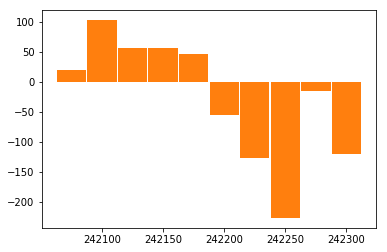

In [84]:
# Now try an animation!
fig, ax = plt.subplots()

line = plt.bar(prices[0,:],volumes[0,:], width=24)

def animate(i):
    line = plt.bar(prices[i,:],volumes[i,:], width=24)
    #line.set_xdata(prices[i,:])
    #line.set_ydata(volumes[i,:])
    return line

ani = animation.FuncAnimation(fig, animate, np.arange(1,2000), interval=25, blit=True)